In [110]:
include("model.jl")
include("Parser.jl")
using JuMP
using Plots

## Data processing

In [111]:
n, m, x_VC, y_VC, x_loc, y_loc, Q, C, q, f, p, tc, B, R, localities_with_high_priorities, M = parse_instance("./Instances/coord50-5-2bBIS_processed.dat")

(50, 5, [15.0, 34.0, 13.0, 10.0, 23.0], [32.0, 13.0, 49.0, 10.0, 49.0], [12.0, 14.0, 13.0, 12.0, 12.0, 10.0, 12.0, 3.0, 1.0, 3.0  …  46.0, 39.0, 36.0, 40.0, 42.0, 44.0, 50.0, 38.0, 48.0, 39.0], [2.0, 14.0, 6.0, 13.0, 14.0, 11.0, 4.0, 8.0, 14.0, 12.0  …  44.0, 45.0, 50.0, 40.0, 50.0, 41.0, 41.0, 41.0, 45.0, 38.0], 150, [300, 300, 300, 300, 300], [16, 12, 20, 16, 12, 11, 16, 12, 13, 19  …  16, 18, 15, 13, 13, 11, 19, 17, 20, 19], [7541, 7062, 5973, 5985, 5716], 1000, 0, 10407.958214832463, [5.662783649265971, 5.46243112713207, 7.196672468318988, 15.198709623707387, 10.569500620255015], [5, 26, 32, 29, 8], 5)

In [112]:
# Create the distance matrix
distance_matrix = zeros(Float64, m, n)

for i in 1:m 
    for j in 1:n
        distance_matrix[i, j] = sqrt((x_VC[i] - x_loc[j])^2 + (y_VC[i] - y_loc[j])^2)
    end
end


# Create reachability matrix a
A = zeros(Int, n, n)


for i in 1:m
    for j in 1:n
        if distance_matrix[i, j] <= R[i]
            A[i, j] = 1
        end
    end
end

In [113]:
D = zeros(Float64, n+m, n+m)
#The n first rows/cols of D relate to the localities, the m last to the VC
#In other words, calling D[i,j] for i in I, j in J corresponds to call D[i+n,j]
for i in 1:m+n
    for j in 1:m+n
        if i <= n && j <= n
            # Both indices in `loc`
            D[i, j] = sqrt((x_loc[i] - x_loc[j])^2 + (y_loc[i] - y_loc[j])^2)
        elseif i > n && j > n
            # Both indices in `VC`
            D[i, j] = sqrt((x_VC[i - n] - x_VC[j - n])^2 + (y_VC[i - n] - y_VC[j - n])^2)
        elseif i > n && j <= n
            # i in `VC`, j in `loc`
            D[i, j] = sqrt((x_VC[i - n] - x_loc[j])^2 + (y_VC[i - n] - y_loc[j])^2)
        else
            # i in `loc`, j in `VC`
            D[i, j] = sqrt((x_loc[i] - x_VC[j - n])^2 + (y_loc[i] - y_VC[j - n])^2)
        end
    end
end

## Models Creation

### OptVax1

In [114]:
model_OptVax1 = solve_OptVax1(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)

obj_val = objective_value(model_OptVax1)
println("Objective Value: ", obj_val)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 8e+03]
  Cost   [1e+01, 2e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+04]
Presolving model
30180 rows, 14952 cols, 135351 nonzeros  0s
22753 rows, 14952 cols, 120032 nonzeros  0s
22138 rows, 14600 cols, 322880 nonzeros  2s
Objective function is integral with scale 1

Solving MIP model with:
   22138 rows
   14600 cols (14600 binary, 0 integer, 0 implied int., 0 continuous)
   322880 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   783             -inf                 inf        0      0      0         0     2.5s
         0       0         0   0.00%   686             -inf                 inf        0      0     12 

In [ ]:
z = value.(model_OptVax1[:z])

for i in 1:(n+m)
    for j in 1:(n+m)
        for k in 1:M
            if z[i,j,k]+z[j,i,k] > 0 
                println(z[i,j,k]+z[j,i,k])
            end
        end
    end
end

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### OptVax2

In [116]:
model_OptVax2 = solve_OptVax2(n, m, D, A, Q, C, q, f, p, B, R, localities_with_high_priorities, M)
obj_val = objective_value(model_OptVax2)
println("Objective Value: ", obj_val)

Running HiGHS 1.8.0 (git hash: fcfb53414): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [7e-02, 8e+03]
  Cost   [1e+01, 2e+01]
  Bound  [1e+00, 1e+00]
  RHS    [1e+00, 1e+04]
Presolving model
30181 rows, 14952 cols, 135403 nonzeros  0s
22754 rows, 14952 cols, 120084 nonzeros  0s
22139 rows, 14600 cols, 322931 nonzeros  2s
Objective function is integral with scale 1

Solving MIP model with:
   22139 rows
   14600 cols (14600 binary, 0 integer, 0 implied int., 0 continuous)
   322931 nonzeros

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
     Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp Confl. | LpIters     Time

         0       0         0   0.00%   783             -inf                 inf        0      0      0         0     2.5s
         0       0         0   0.00%   686             -inf                 inf        0      0      3 

In [117]:
function plot_solution(model, x_VC, y_VC, x_loc, y_loc, R, n, m, M, localities_with_high_priorities)
    # Retrieve the optimized values of y, z, and delta from the model
    y_values = value.(model[:y])
    z_values = value.(model[:z])  # z_values is a 3D array with dimensions (i, j, k)
    delta_values = value.(model[:delta])

    # Create a new plot
    color = :blue
    plt = plot()
        # Plot loc points without adding them to the legend (but with single labels for groups)
    first_black = true
    first_green = true
    for j in 1:n
        if j in localities_with_high_priorities
            # Plot green square points and add label only for the first one
            if first_green
                scatter!(plt, [x_loc[j]], [y_loc[j]], color=:green, marker=:square, aspect_ratio=:equal, label="High priority")
                first_green = false
            else
                scatter!(plt, [x_loc[j]], [y_loc[j]], color=:green, marker=:square, aspect_ratio=:equal, label="")
            end
        else
            # Plot black circle points and add label only for the first one
            if first_black
                scatter!(plt, [x_loc[j]], [y_loc[j]], color=:black, marker=:circle, aspect_ratio=:equal, label="Low priority")
                first_black = false
            else
                scatter!(plt, [x_loc[j]], [y_loc[j]], color=:black, marker=:circle, aspect_ratio=:equal, label="")
            end
        end
    end

    # For each VC point, check if y[i] is 1; if so, plot in red and add a shaded circle
    for i in 1:length(x_VC) 
        if y_values[i] == 1
            # Plot the VC point in red
            scatter!(plt, [x_VC[i]], [y_VC[i]], color=:red, marker=:star5, label="VC")
            
            # Draw a shaded circle of radius R[i] around the VC location
            θ = range(0, 2π, length=100)
            circle_x = x_VC[i] .+ R[i] .* cos.(θ)
            circle_y = y_VC[i] .+ R[i] .* sin.(θ)
            plot!(plt, circle_x, circle_y, lw=1.5, linecolor=:red, label="", fillalpha=0.1, fillcolor=:red)
        end
    end

    # Create a color gradient (you can use other gradient types too)
    color_map = [:blue,:teal,:green,:darkred,:orange]

    # For all z[i,j,k], draw arrows only if z[i,j,k] == 1 for any k
    for i in 1:(m+n)
        for j in 1:(m+n)
            # Check if z[i, j, k] == 1 for any k
            for k in 1:M
                if abs(z_values[i, j, k] - 1.0) < 1e-6
                    # Scale the color based on the value of k, you can normalize it if needed
                    color = color_map[k]  # This gives a color based on the value of k

                    # Create the arrows with the color mapped to k
                    if i <= n && j <= n
                        # Arrow from loc[i] to loc[j]
                        dx = x_loc[j] - x_loc[i]
                        dy = y_loc[j] - y_loc[i]
                        quiver!(plt, [x_loc[i]], [y_loc[i]], quiver=([dx], [dy]), color=color, linewidth=1, arrowhead=2)
                    elseif i > n && j > n
                        # Arrow from VC[i] to VC[j]
                        dx = x_VC[j - n] - x_VC[i - n]
                        dy = y_VC[j - n] - y_VC[i - n]
                        quiver!(plt, [x_VC[i - n]], [y_VC[i - n]], quiver=([dx],[dy]), color=color, linewidth=1, arrowhead=2)
                    elseif i <= n && j > n
                        # Arrow from loc[i] to VC[j]
                        dx = x_VC[j - n] - x_loc[i]
                        dy = y_VC[j - n] - y_loc[i]
                        quiver!(plt, [x_loc[i]], [y_loc[i]], quiver=([dx], [dy]), color=color, linewidth=1, arrowhead=2)
                    elseif i > n && j <= n
                        # Arrow from VC[i] to loc[j]
                        dx = x_loc[j] - x_VC[i - n]
                        dy = y_loc[j] - y_VC[i - n]
                        quiver!(plt, [x_VC[i - n]], [y_VC[i - n]], quiver=([dx], [dy]), color=color, linewidth=1, arrowhead=2)
                    end
                end
            end
        end
    end

    # Display the final plot
    savefig(plt, "test.pdf")
    display(plt)
end


plot_solution (generic function with 1 method)

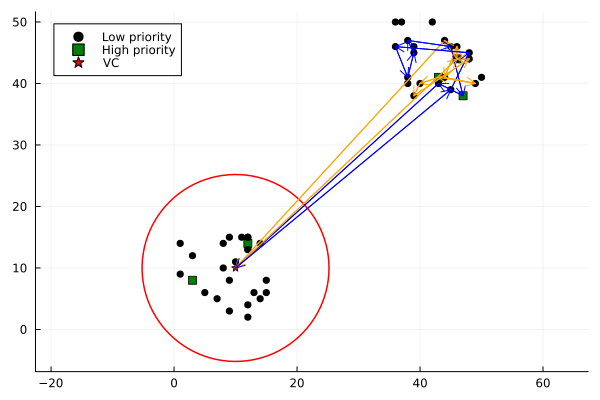

In [118]:
plot_solution(model_OptVax1, x_VC, y_VC, x_loc, y_loc, R,n,m,M, localities_with_high_priorities)